# MACHINE LEARNING PROJECT

## Fotoğraflardaki El Yazısı Rakamları Otomatik Tanıma ve Anlamlandırma

## (Automatic Recognition and Meaning of Handwritten Numbers in Photos)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# veri setini yüklemek
# (upload the dataset)
mnist = fetch_openml('mnist_784')
x=mnist.data
y=mnist.target
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
x.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [4]:
x.index

RangeIndex(start=0, stop=70000, step=1)

In [5]:
type(x)

pandas.core.frame.DataFrame

In [6]:
len(x)

70000

In [7]:
len(x.columns)

784

In [8]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel1,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel780,70000.0,0.001714,0.320889,0.0,0.0,0.0,0.0,62.0
pixel781,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel783,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


# veri setindeki el yazılarını görselleştirme fonksiyonu


# function to visualize handwriting in dataset

In [10]:
def showimage(dframe,index):
    some_digit=dframe.to_numpy()[index]
    some_digit_image=some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap="binary")
    plt.axis("off")
    plt.show()

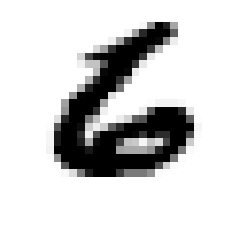

In [11]:
showimage(mnist.data,69999)

# test-train

In [12]:
train_img,test_img,train_lbl,test_lbl=train_test_split(x,y,test_size=1/7.0,random_state=15)

In [13]:
test_img_copy = test_img.copy()

In [14]:
scaler=StandardScaler()
scaler.fit(train_img)
train_img=scaler.transform(train_img)
test_img=scaler.transform(test_img)

# PCA

In [15]:
pca = PCA(.95)

In [16]:
pca.fit(train_img)

PCA(n_components=0.95)

In [17]:
pca.n_components_

331

# test-train(pca)

In [18]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

# resgression model

In [19]:
logistic_reg=LogisticRegression(solver="lbfgs",max_iter=10000)

In [20]:
logistic_reg.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

# to test

In [21]:
logistic_reg.score(test_img, test_lbl)

0.9306

In [22]:
logistic_reg.predict(test_img[0].reshape(1,-1))

array(['1'], dtype=object)

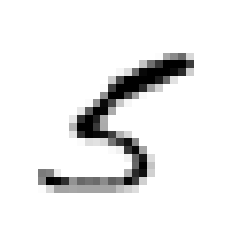

In [23]:
showimage(test_img_copy, 0)

In [24]:
logistic_reg.predict(test_img[5].reshape(1,-1))

array(['9'], dtype=object)

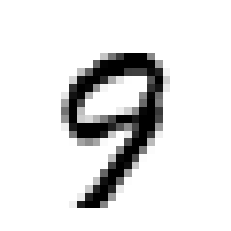

In [25]:
showimage(test_img_copy, 5)

In [26]:
logistic_reg.predict(test_img[250].reshape(1,-1))

array(['0'], dtype=object)

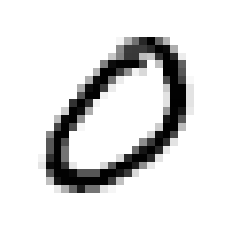

In [27]:
showimage(test_img_copy, 250)